In [4]:
import dendropy as dp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import pickle
# from Bio import SeqIO
# import datetime
sns.set(style='whitegrid', font_scale=1.3)

In [5]:
tree = dp.Tree.get(path='./dengue_rerooted.newick', schema="newick")

colors = pickle.load(open('../../figures/colors.p', 'rb'))
colors.update({'DENV': (0,0,0,1)})

In [21]:
def get_serotype_leaves(tree):
    
    serotypes = ['DENV1', 'DENV2', 'DENV3', 'DENV4']
    
    serotype_leaves = {}
    for s in serotypes:
        leaves = [k for k in tree.leaf_iter() if k.taxon.label.startswith(s)]
        serotype_leaves[s] = leaves
        
    return serotype_leaves

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:7: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  import sys


DENV1 10
DENV2 16
DENV3 9
DENV4 12


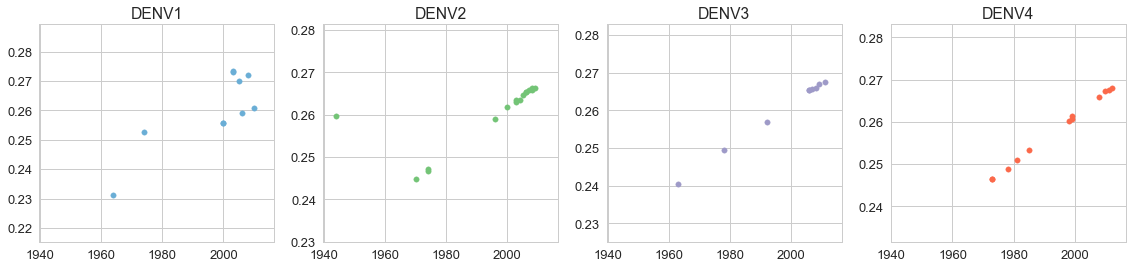

In [28]:
def plot_clock(serotype_leaves, color_map=colors):
    
    def get_clock_vals(leaves):
        dates = []
        divs = []
        colors = []
        for k in leaves:
            try:
                date_val = float(k.taxon.label.split('/')[-1])
                div_val = k.distance_from_root()
                serotype = k.taxon.label.split('/')[0].strip()
                color = color_map[serotype]
                dates.append(date_val)
                divs.append(div_val)
                colors.append(color)
            except:
                continue
        return dates, divs, colors
    
    fig, axes = plt.subplots(ncols=len(serotype_leaves.keys()), figsize=(16,4), sharex=True)
    for serotype, ax in zip(sorted(serotype_leaves.keys()), axes):
        leaves = serotype_leaves[serotype]
        print serotype, len(leaves)
        dates, divs, colors = get_clock_vals(leaves)
        ax.scatter(dates, divs, s=30, c=color_map[serotype])
        ax.set_title(serotype)
            
    plt.tight_layout()
    plt.show()

serotype_leaves = get_serotype_leaves(tree)
plot_clock(serotype_leaves)

In [29]:
# def plot_tree(tree, subtrees = serotype_mrcas, color_map = colors):
        
#     def plot_subtree(subtree, ax=None):
#         if ax is None:
#             fig, ax = plt.subplots(figsize=(8,12))
#         branchWidth=2 ## default branch width
# #         ax.set_yticks(size=0)
#         for k in subtree.Objects: ## iterate over objects in tree
#             x=k.x ## or use absolute time instead
#             y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
#             xp=k.parent.x ## get x position of current object's parent
#             if x==None: ## matplotlib won't plot Nones, like root
#                 x=0.0
#             if xp==None:
#                 xp=x
#             try:
# #                 c = color_map[k.numName.split('_')[0]]
#                 c = color_map(int(k.numName.split('_')[-1]))
#             except:
#                 c = 'gray'
#             if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
#                 s=10 ## tip size can be fixed
#                 ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
#                 ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath

#             elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
#                 ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9)
#             ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
#         ax.set_xlabel('Substitutions per site')
#         ax.spines['top'].set_visible(False) ## no axes
#         ax.spines['right'].set_visible(False)
#         ax.spines['left'].set_visible(False)
#         ax.xaxis.grid(True)
#         x0,x1 = plt.xlim()
#         ax.set_xlim((x0, x1*1.1))

#     if subtrees is None:
#         plot_subtree(tree)
        
#     else:
#         fig, axes = plt.subplots(ncols=2, nrows=int(len(subtrees.keys())/2), figsize=(12,12))
        
#         for label, ax in zip(sorted(subtrees.keys()), axes.flatten().flatten()):
#             subtree = tree.subtree(subtrees[label],absoluteTime=False)
#             subtree.sortBranches()
#             subtree.drawTree()
#             plot_subtree(subtree, ax)
#             ax.set_title(label)
            
#     plt.tight_layout()
#     plt.show()
    
# plot_tree(tree, color_map=colors)